In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
df = pd.read_csv('final_ablation_study_results.csv')

In [4]:
df

,features,macro_f1,micro_f1,weighted_f1,precision,recall
0,"('cite_pos_in_sent',)",0.410982,0.560,0.549278,0.559552,0.560
1,"('direct_citations',)",0.405474,0.522,0.531280,0.552352,0.522
2,"('diff_publication_date',)",0.405590,0.572,0.559881,0.568919,0.572
3,"('cited_publication_info',)",0.396865,0.572,0.561207,0.557627,0.572
4,"('sent_pos_in_article',)",0.417787,0.534,0.545737,0.567075,0.534
...,...,...,...,...,...,...
122,"('cite_pos_in_sent', 'direct_citations', 'diff...",0.475003,0.582,0.590847,0.611631,0.582
123,"('cite_pos_in_sent', 'direct_citations', 'cite...",0.424642,0.566,0.568219,0.571719,0.566
124,"('cite_pos_in_sent', 'diff_publication_date', ...",0.479732,0.578,0.583851,0.599905,0.578
125,"('direct_citations', 'diff_publication_date', ...",0.447086,0.576,0.577246,0.588414,0.576


In [5]:
def translate_features(feature_tuple_str):
    feature_tuple = eval(feature_tuple_str)  # convert string to tuple
    return tuple(feature_mapping[feature] for feature in feature_tuple)

In [6]:
feature_mapping = {
    'cite_pos_in_sent': 'F1',
    'sent_pos_in_article': 'F2',
    'direct_citations': 'F3',
    'diff_publication_date': 'F4',
    'cited_publication_info': 'F5',
    'citing_concepts': 'F6',
    'cited_concepts': 'F7',
}

In [7]:
df['F_features'] = df['features'].apply(translate_features)

In [8]:
len(df.F_features)

127

In [9]:
df#.loc[df.F_features]

,features,macro_f1,micro_f1,weighted_f1,precision,recall,F_features
0,"('cite_pos_in_sent',)",0.410982,0.560,0.549278,0.559552,0.560,"(F1,)"
1,"('direct_citations',)",0.405474,0.522,0.531280,0.552352,0.522,"(F3,)"
2,"('diff_publication_date',)",0.405590,0.572,0.559881,0.568919,0.572,"(F4,)"
3,"('cited_publication_info',)",0.396865,0.572,0.561207,0.557627,0.572,"(F5,)"
4,"('sent_pos_in_article',)",0.417787,0.534,0.545737,0.567075,0.534,"(F2,)"
...,...,...,...,...,...,...,...
122,"('cite_pos_in_sent', 'direct_citations', 'diff...",0.475003,0.582,0.590847,0.611631,0.582,"(F1, F3, F4, F2, F6, F7)"
123,"('cite_pos_in_sent', 'direct_citations', 'cite...",0.424642,0.566,0.568219,0.571719,0.566,"(F1, F3, F5, F2, F6, F7)"
124,"('cite_pos_in_sent', 'diff_publication_date', ...",0.479732,0.578,0.583851,0.599905,0.578,"(F1, F4, F5, F2, F6, F7)"
125,"('direct_citations', 'diff_publication_date', ...",0.447086,0.576,0.577246,0.588414,0.576,"(F3, F4, F5, F2, F6, F7)"


In [10]:
df_single = df[df['F_features'].apply(lambda x: len(x) == 2)]

In [11]:
df_single = df_single.drop(columns = ['recall'])


In [12]:
df_single = df_single.drop(columns = ['weighted_f1', 'precision'])

In [13]:
df_single.drop(columns=['F_features'], inplace = True)

In [14]:
df_melted = pd.melt(df_single, id_vars="features", var_name="metrics", value_name="values")


In [15]:
df_melted = df_melted.sort_values('metrics', ascending=False)

In [17]:
pattern = r"[()',]"

In [18]:
def remove_symbols(text):
    pattern = r"[()',]"
    return re.sub(pattern, "", text)

In [19]:
df_melted['features'] = df_melted['features'].apply(remove_symbols)

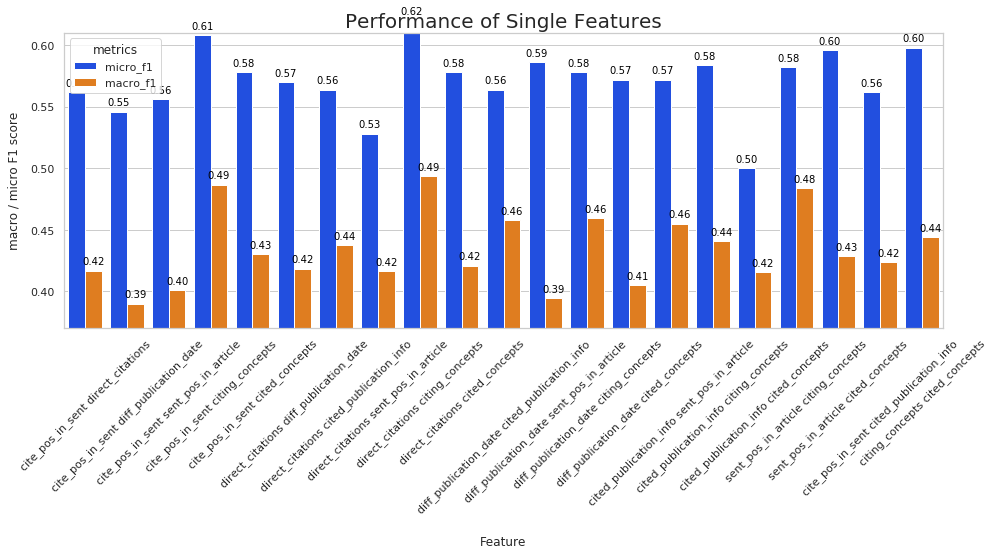

In [20]:
# Set the theme and color palette of seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 5)

# Create the barplot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='features', y='values', hue='metrics', data=df_melted, palette=palette)

plt.ylim(0.37, 0.61) # Set y-axis limits
plt.title('Performance of Single Features', fontsize=20) # Add a title
plt.xticks(rotation=45) # Rotate the x labels for better visibility
plt.xlabel('Feature', fontsize=12, labelpad=20)
plt.ylabel('macro / micro F1 score', fontsize=12, labelpad=10)

# Adding values to bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:1.2f}'.format(height),
            ha="center", color='black', size=10)

plt.tight_layout() # Adjusts the plot for better visibility
plt.savefig('figures/performance_single_feature.png', dpi=300)
plt.show()

In [138]:
df

,features,macro_f1,micro_f1,weighted_f1,precision,recall
0,"('cite_pos_in_sent',)",0.410982,0.560,0.549278,0.559552,0.560
1,"('direct_citations',)",0.405474,0.522,0.531280,0.552352,0.522
2,"('diff_publication_date',)",0.405590,0.572,0.559881,0.568919,0.572
3,"('cited_publication_info',)",0.396865,0.572,0.561207,0.557627,0.572
4,"('sent_pos_in_article',)",0.417787,0.534,0.545737,0.567075,0.534
...,...,...,...,...,...,...
122,"('cite_pos_in_sent', 'direct_citations', 'diff...",0.475003,0.582,0.590847,0.611631,0.582
123,"('cite_pos_in_sent', 'direct_citations', 'cite...",0.424642,0.566,0.568219,0.571719,0.566
124,"('cite_pos_in_sent', 'diff_publication_date', ...",0.479732,0.578,0.583851,0.599905,0.578
125,"('direct_citations', 'diff_publication_date', ...",0.447086,0.576,0.577246,0.588414,0.576


In [21]:
df['number_of_features'] = df.F_features.apply(lambda x: len(x))

In [22]:
df.groupby('number_of_features').count()['features'].reset_index().drop(columns = ['number_of_features'])

,features
0,7
1,21
2,35
3,35
4,21
5,7
6,1


In [23]:
num_of_features = df[['macro_f1', 'micro_f1', 'number_of_features']]

In [24]:
num_of_features = num_of_features.groupby('number_of_features').mean().reset_index()

In [25]:
num_of_features.sort_values('micro_f1')

,number_of_features,macro_f1,micro_f1
0,1,0.412244,0.544857
2,3,0.436208,0.563143
3,4,0.439280,0.570057
1,2,0.434245,0.571619
4,5,0.451955,0.576381
5,6,0.454735,0.576857
6,7,0.430099,0.622000


In [14]:
num_of_features['count_exp'] = df.groupby('number_of_features').count()['features'].reset_index().drop(columns = ['number_of_features'])

In [15]:
num_of_features[['number_of_features', 'count_exp']] = num_of_features[['number_of_features', 'count_exp']].astype(str)

In [16]:
num_of_features['number_of_features'] = num_of_features.number_of_features + ' (combinations: ' + num_of_features.count_exp + ')'

In [17]:
num_of_features.drop(columns=['count_exp'], inplace = True)

In [18]:
df_melted = pd.melt(num_of_features, id_vars="number_of_features", var_name="metrics", value_name="values")

In [25]:
df_melted = df_melted.sort_values('metrics', ascending=False)

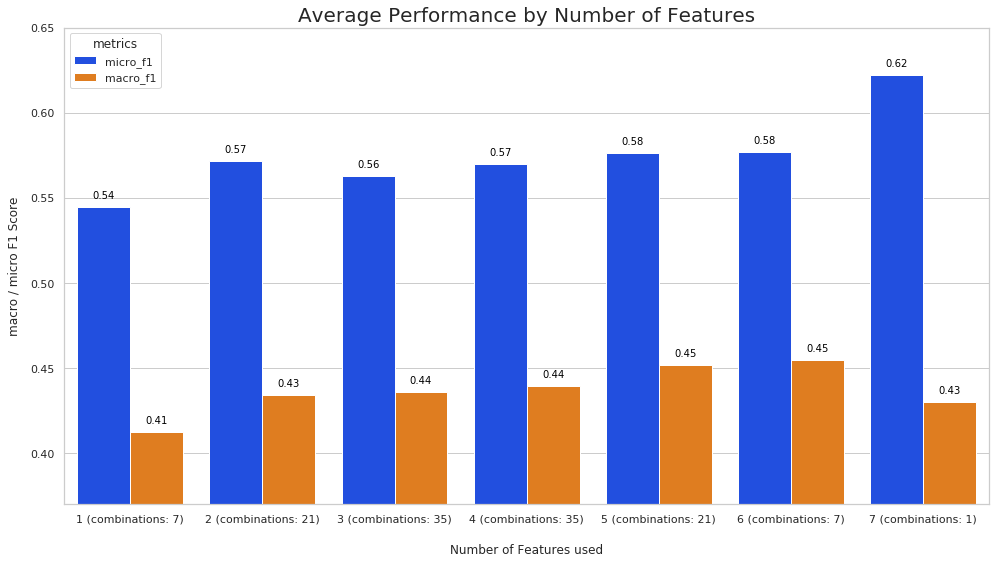

In [27]:
# Set the theme and color palette of seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 5)

# Create the barplot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='number_of_features', y='values', hue='metrics', data=df_melted, palette=palette)
plt.xlabel('Number of Features used', fontsize=12, labelpad=20)
plt.ylabel('macro / micro F1 Score', fontsize=12, labelpad=10)
plt.ylim(0.37, 0.65) # Set y-axis limits
plt.title('Average Performance by Number of Features', fontsize=20) # Add a title
#plt.xticks(rotation=45) # Rotate the x labels for better visibility

# Adding values to bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:1.2f}'.format(height),
            ha="center", color='black', size=10)

plt.tight_layout() # Adjusts the plot for better visibility
plt.savefig('figures/avg_number_of_features.png', dpi=300)
plt.show()

In [143]:
df_double = df[df['F_features'].apply(lambda x: len(x) == 2)]

In [145]:
df_double =df_double[['features', 'macro_f1', 'micro_f1']]

In [149]:
df_double

,features,macro_f1,micro_f1
7,"cite_pos_in_sent, direct_citations",0.416824,0.562
8,"cite_pos_in_sent, diff_publication_date",0.389901,0.546
9,"cite_pos_in_sent, cited_publication_info",0.423774,0.562
10,"cite_pos_in_sent, sent_pos_in_article",0.401055,0.556
11,"cite_pos_in_sent, citing_concepts",0.486495,0.608
12,"cite_pos_in_sent, cited_concepts",0.430108,0.578
13,"direct_citations, diff_publication_date",0.418474,0.570
14,"direct_citations, cited_publication_info",0.437557,0.564
15,"direct_citations, sent_pos_in_article",0.416252,0.528
16,"direct_citations, citing_concepts",0.493485,0.620


In [147]:
def remove_symbols(text):
    pattern = r"[()']"
    return re.sub(pattern, "", text)

In [148]:
df_double['features'] = df_double['features'].apply(remove_symbols)

<ipython-input-148-18b665b8d123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_double['features'] = df_double['features'].apply(remove_symbols)


In [150]:
df_melted = pd.melt(df_double, id_vars="features", var_name="metrics", value_name="values")

In [179]:
df_melted

,features,metrics,values
1,"cite_pos_in_sent, diff_publication_date",macro_f1,0.389901
12,"diff_publication_date, sent_pos_in_article",macro_f1,0.394221
3,"cite_pos_in_sent, sent_pos_in_article",macro_f1,0.401055
14,"diff_publication_date, cited_concepts",macro_f1,0.405033
17,"cited_publication_info, cited_concepts",macro_f1,0.415396
8,"direct_citations, sent_pos_in_article",macro_f1,0.416252
0,"cite_pos_in_sent, direct_citations",macro_f1,0.416824
6,"direct_citations, diff_publication_date",macro_f1,0.418474
10,"direct_citations, cited_concepts",macro_f1,0.420970
2,"cite_pos_in_sent, cited_publication_info",macro_f1,0.423774


In [181]:
df_melted = df_melted.sort_values(by = ['metrics','values'], ascending=[False, True])

In [ ]:
by=['Fee','Discount'], inplace=True,
               ascending = [True, True])

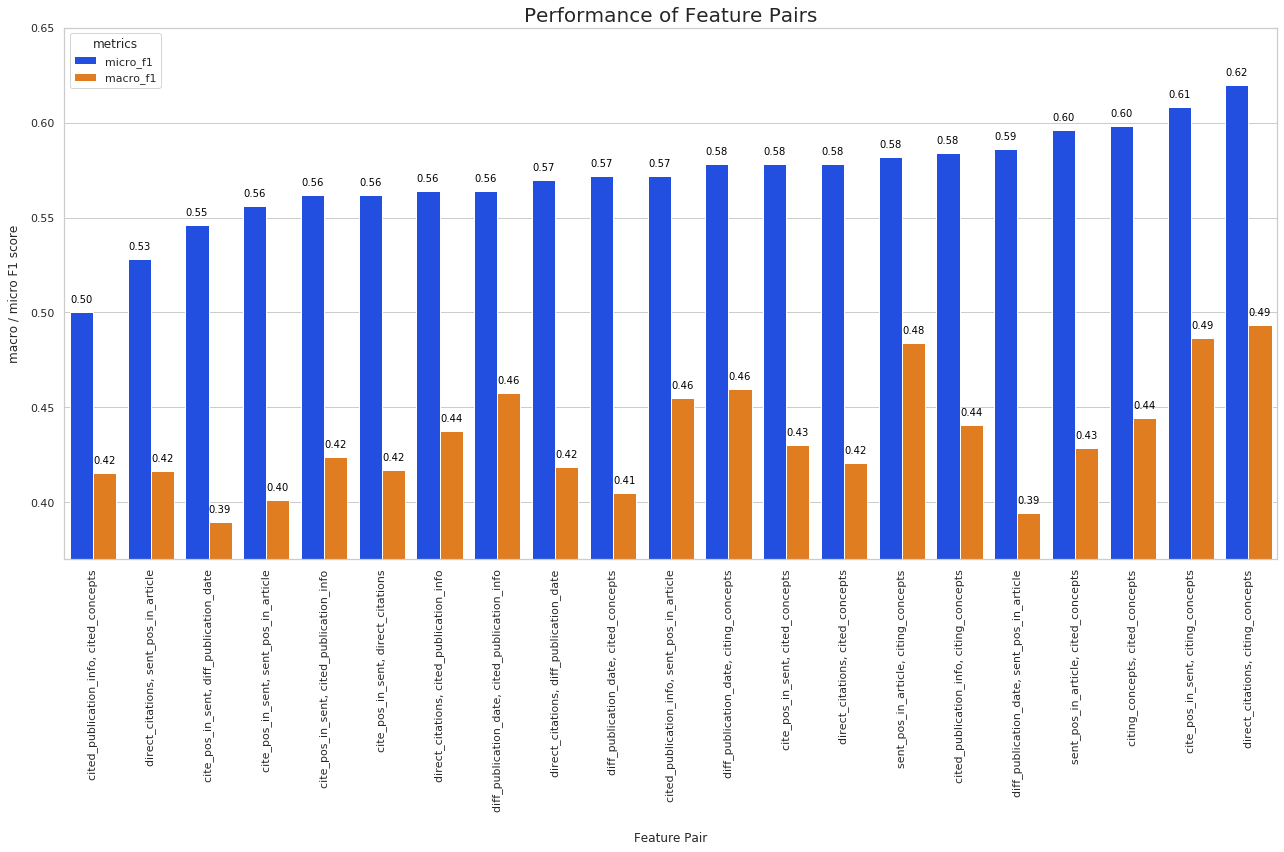

In [182]:
# Set the theme and color palette of seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 5)

# Create the barplot
plt.figure(figsize=(18, 12))
bar_plot = sns.barplot(x='features', y='values', hue='metrics', data=df_melted, palette=palette)

plt.ylim(0.37, 0.65) # Set y-axis limits
plt.title('Performance of Feature Pairs', fontsize=20) # Add a title
plt.xticks(rotation=90) # Rotate the x labels for better visibility
plt.xlabel('Feature Pair', fontsize=12, labelpad=20)
plt.ylabel('macro / micro F1 score', fontsize=12, labelpad=10)

# Adding values to bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:1.2f}'.format(height),
            ha="center", color='black', size=10)

plt.tight_layout() # Adjusts the plot for better visibility
plt.savefig('figures/performance_feature_pairs.png', dpi=300)
plt.show()

In [196]:
df

,features,macro_f1,micro_f1,weighted_f1,precision,recall
0,"('cite_pos_in_sent',)",0.410982,0.560,0.549278,0.559552,0.560
1,"('direct_citations',)",0.405474,0.522,0.531280,0.552352,0.522
2,"('diff_publication_date',)",0.405590,0.572,0.559881,0.568919,0.572
3,"('cited_publication_info',)",0.396865,0.572,0.561207,0.557627,0.572
4,"('sent_pos_in_article',)",0.417787,0.534,0.545737,0.567075,0.534
...,...,...,...,...,...,...
122,"('cite_pos_in_sent', 'direct_citations', 'diff...",0.475003,0.582,0.590847,0.611631,0.582
123,"('cite_pos_in_sent', 'direct_citations', 'cite...",0.424642,0.566,0.568219,0.571719,0.566
124,"('cite_pos_in_sent', 'diff_publication_date', ...",0.479732,0.578,0.583851,0.599905,0.578
125,"('direct_citations', 'diff_publication_date', ...",0.447086,0.576,0.577246,0.588414,0.576


In [186]:
ground_model = pd.read_csv('/home/roland/Projects/JP_citation_classification/final_testing/ablation_study_results.csv')

In [214]:
worst = df.sort_values('weighted_f1').head(4)

In [215]:
best = df.sort_values('weighted_f1').tail(4)

In [216]:
df = worst.append(best)

<ipython-input-216-5efb5762ec46>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = worst.append(best)


In [219]:
df['features'] = df['features'].apply(translate_features)

In [220]:
df = df[['features', 'macro_f1', 'micro_f1']]

In [221]:
df.features

,features,macro_f1,micro_f1
6,"(F7,)",0.404311,0.476
47,"(F3, F5, F2)",0.371870,0.490
24,"(F5, F7)",0.415396,0.500
60,"(F5, F2, F7)",0.370849,0.520
76,"(F1, F4, F2, F6)",0.477099,0.622
89,"(F3, F5, F2, F6)",0.489989,0.624
35,"(F1, F4, F6)",0.507925,0.628
50,"(F3, F2, F6)",0.516114,0.636


In [222]:
df_melted = pd.melt(df, id_vars="features", var_name="metrics", value_name="values")

In [225]:
df_melted['features'] = df_melted['features'].astype(str).apply(remove_symbols)

In [226]:
df_melted

,features,metrics,values
0,"F7,",macro_f1,0.404311
1,"F3, F5, F2",macro_f1,0.371870
2,"F5, F7",macro_f1,0.415396
3,"F5, F2, F7",macro_f1,0.370849
4,"F1, F4, F2, F6",macro_f1,0.477099
5,"F3, F5, F2, F6",macro_f1,0.489989
6,"F1, F4, F6",macro_f1,0.507925
7,"F3, F2, F6",macro_f1,0.516114
8,"F7,",micro_f1,0.476000
9,"F3, F5, F2",micro_f1,0.490000


In [227]:
df_melted = df_melted.sort_values(by = ['metrics','values'], ascending=[False, True])

In [230]:
ground_model = ground_model[['macro_f1', 'micro_f1']]

In [231]:
ground_model

,macro_f1,micro_f1
0,0.391562,0.546


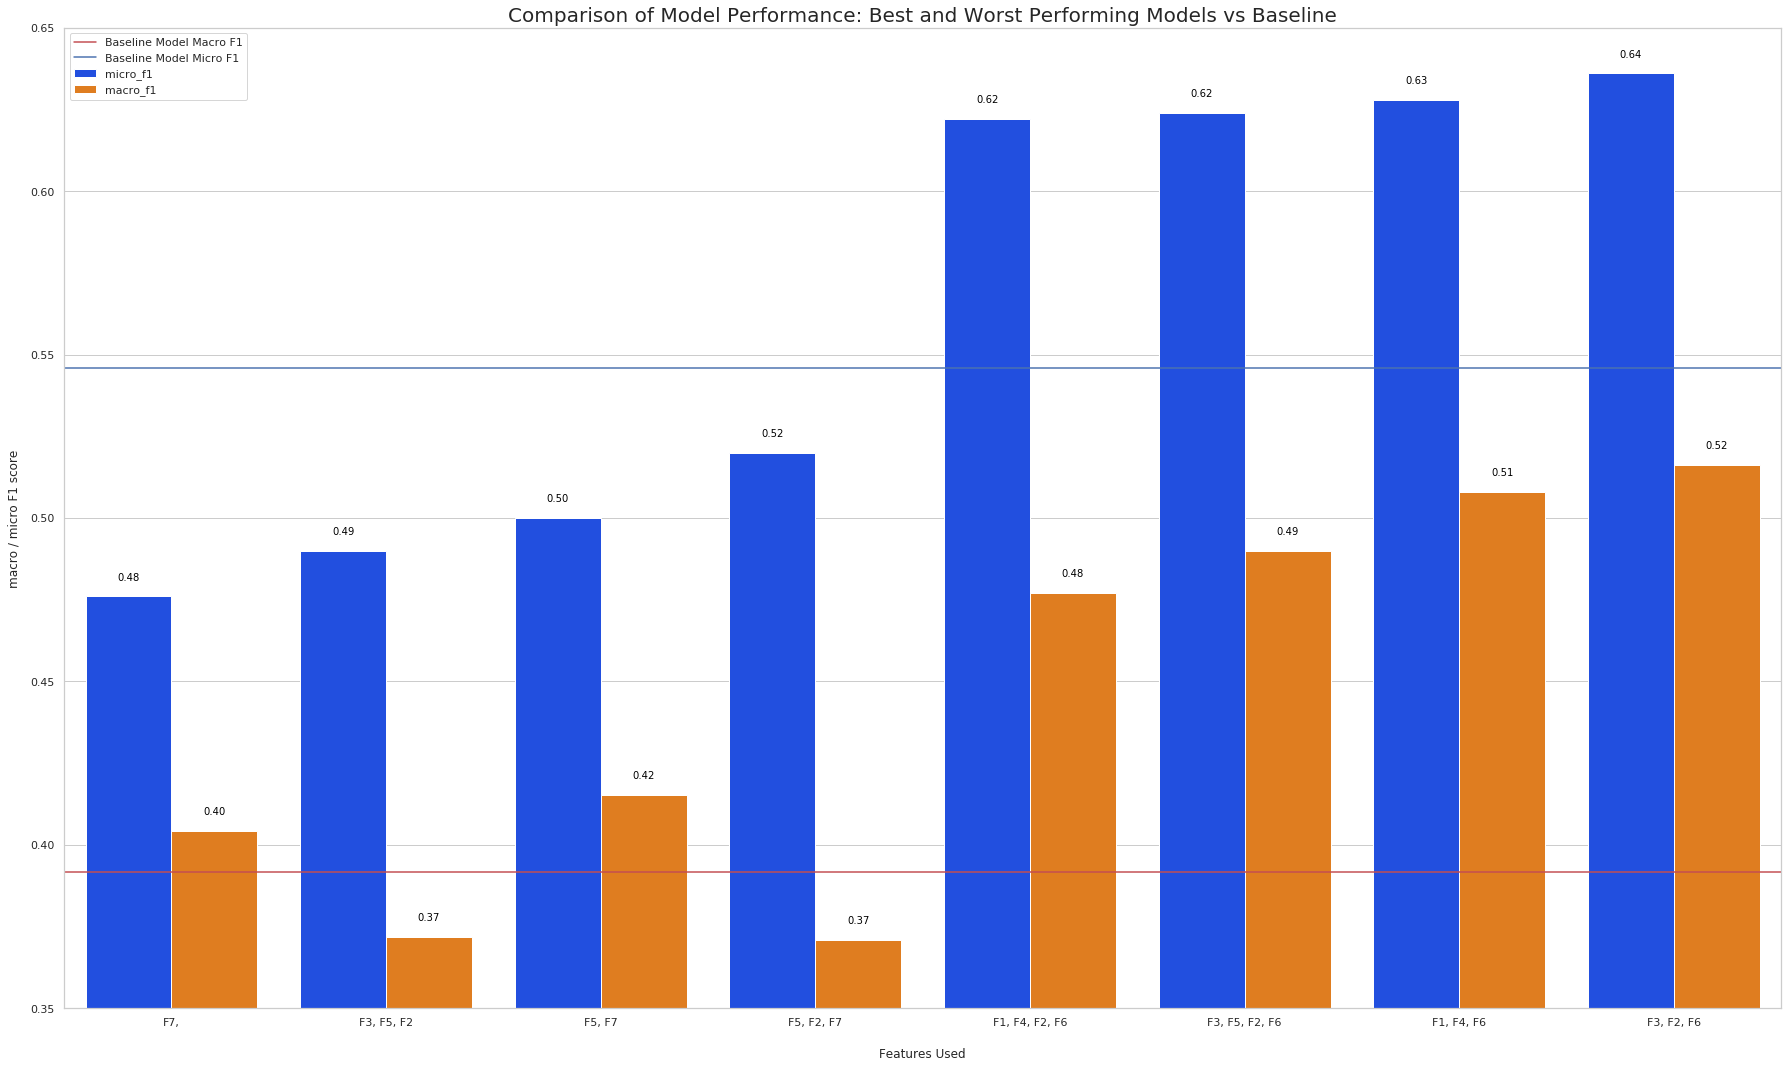

In [243]:
# Set the theme and color palette of seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 5)

# Create the barplot
plt.figure(figsize=(25, 15))
bar_plot = sns.barplot(x='features', y='values', hue='metrics', data=df_melted, palette=palette)

plt.ylim(0.35, 0.65) # Set y-axis limits
plt.title('Comparison of Model Performance: Best and Worst Performing Models vs Baseline', fontsize=20) # Add a title
#plt.xticks(rotation=90) # Rotate the x labels for better visibility
plt.xlabel('Features Used', fontsize=12, labelpad=20)
plt.ylabel('macro / micro F1 score', fontsize=12, labelpad=10)

# Add horizontal lines for the ground model
line_macro = plt.axhline(y=0.391562, color='r', linestyle='-', label='Baseline Model Macro F1')
line_micro = plt.axhline(y=0.546, color='b', linestyle='-', label='Baseline Model Micro F1')

# Add the ground model lines to the legend
from matplotlib.lines import Line2D
handles, labels = bar_plot.get_legend_handles_labels()

# create line objects for the additional lines (ground model macro/micro)
custom_lines = [Line2D([0], [0], color='r', lw=2), Line2D([0], [0], color='b', lw=2)]

# extend the legend with the new lines and their labels
handles.extend(custom_lines)
#labels.extend(['ground model macro f1', 'ground model micro f1'])

plt.legend(handles=handles, labels=labels)

# Adding values to bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:1.2f}'.format(height),
            ha="center", color='black', size=10)

plt.tight_layout() # Adjusts the plot for better visibility
#plt.savefig('figures/performance_feature_pairs.png', dpi=300)
plt.show()

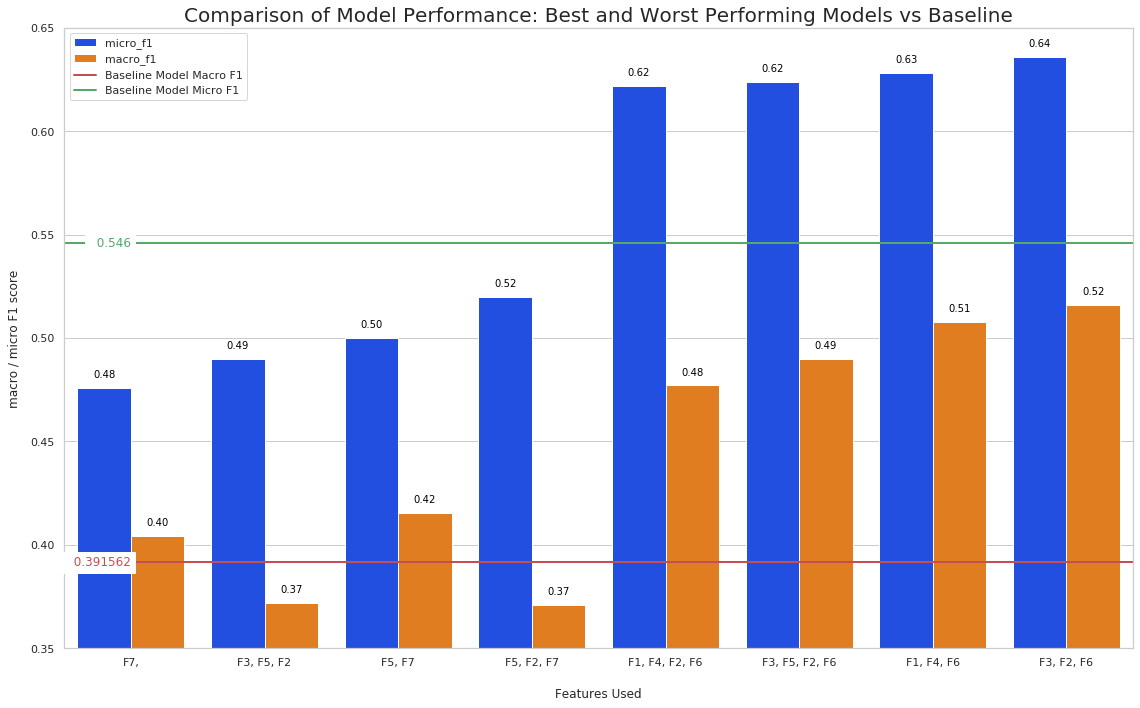

In [254]:
# Set the theme and color palette of seaborn
sns.set_theme(style="whitegrid")
palette = sns.color_palette("bright", 5)

# Create the barplot
plt.figure(figsize=(16, 10))
bar_plot = sns.barplot(x='features', y='values', hue='metrics', data=df_melted, palette=palette)

plt.ylim(0.35, 0.65) # Set y-axis limits
plt.title('Comparison of Model Performance: Best and Worst Performing Models vs Baseline', fontsize=20) # Add a title
#plt.xticks(rotation=90) # Rotate the x labels for better visibility
plt.xlabel('Features Used', fontsize=12, labelpad=20)
plt.ylabel('macro / micro F1 score', fontsize=12, labelpad=10)

# Adding values to bars
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:1.2f}'.format(height),
            ha="center", color='black', size=10)

# Add horizontal lines for the ground model
line_macro = plt.axhline(y=0.391562, color='r', linestyle='-', lw=2)
line_micro = plt.axhline(y=0.546, color='g', linestyle='-', lw=2)

# Text on the lines
plt.text(0, 0.391562, '  0.391562', color='r', va='center', ha='right', backgroundcolor='w')
plt.text(0, 0.546, '  0.546', color='g', va='center', ha='right', backgroundcolor='w')

# Add the ground model lines to the legend
from matplotlib.lines import Line2D
handles, labels = bar_plot.get_legend_handles_labels()

# create line objects for the additional lines (ground model macro/micro)
custom_lines = [Line2D([0], [0], color='r', lw=2), Line2D([0], [0], color='g', lw=2)]

# extend the legend with the new lines and their labels
handles.extend(custom_lines)
labels.extend(['Baseline Model Macro F1', 'Baseline Model Micro F1'])

plt.legend(handles=handles, labels=labels)

plt.tight_layout() # Adjusts the plot for better visibility
plt.savefig('figures/baseline_comparison.png', dpi=300)
plt.show()


In [256]:
df_melted

,features,metrics,values
8,"F7,",micro_f1,0.476000
9,"F3, F5, F2",micro_f1,0.490000
10,"F5, F7",micro_f1,0.500000
11,"F5, F2, F7",micro_f1,0.520000
12,"F1, F4, F2, F6",micro_f1,0.622000
13,"F3, F5, F2, F6",micro_f1,0.624000
14,"F1, F4, F6",micro_f1,0.628000
15,"F3, F2, F6",micro_f1,0.636000
3,"F5, F2, F7",macro_f1,0.370849
1,"F3, F5, F2",macro_f1,0.371870


In [257]:
df

,features,macro_f1,micro_f1
6,"(F7,)",0.404311,0.476
47,"(F3, F5, F2)",0.371870,0.490
24,"(F5, F7)",0.415396,0.500
60,"(F5, F2, F7)",0.370849,0.520
76,"(F1, F4, F2, F6)",0.477099,0.622
89,"(F3, F5, F2, F6)",0.489989,0.624
35,"(F1, F4, F6)",0.507925,0.628
50,"(F3, F2, F6)",0.516114,0.636


In [258]:
reverse_mapping = {v: k for k, v in feature_mapping.items()}


In [259]:
reverse_mapping

{'F1': 'cite_pos_in_sent',
 'F2': 'sent_pos_in_article',
 'F3': 'direct_citations',
 'F4': 'diff_publication_date',
 'F5': 'cited_publication_info',
 'F6': 'citing_concepts',
 'F7': 'cited_concepts'}